первое задание

(метод k ближайших соседей)

In [86]:
from sklearn import datasets, metrics, neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, neighbors
from matplotlib.colors import ListedColormap

Генерируем обучающую выборку из описанных двумя признаками объектов нескольких класссов (100 обектов, 2 признака, 

In [87]:
classification = datasets.make_classification(100,n_features=2,n_informative=2,\
                                              n_classes=4, n_redundant=0, n_clusters_per_class=1)

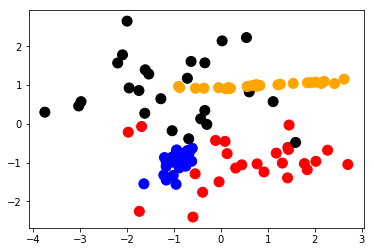

In [88]:
colors = ListedColormap(['blue','red', 'black', 'orange'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])
plt.figure()
plt.scatter(map(lambda x: x[0], classification[0]),map(lambda x: x[1], classification[0]),\
            c=classification[1], cmap=colors, s=100)
plt.show()

Разбиваем на обучающую и тестовую выборки


In [89]:
train_data, test_data, train_labels, test_labels = train_test_split(classification_problem[0],\
                                                  classification_problem[1], test_size = 0.3, \
                                                  random_state = 1)

Получаем границы для meshgrid'a

In [90]:
def get_meshgrid(data, step=.05, border=.5):
    # Получение границ для meshgrid'a
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [93]:

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors=colors, light_colors=light_colors):
    # fit
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize = (16, 6))

    
    # Построение разделяющих поверхностей для тренировочной выборки
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)

    # Предсказанная принадлежность к классу
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), \
                                                    yy.ravel()])).reshape(xx.shape)
    # Раскрашивание поверхности
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, \
                                                   estimator.predict(train_data))))
    
    # Построение разделяющих поверхностей для тестовой выборки
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(\
                        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

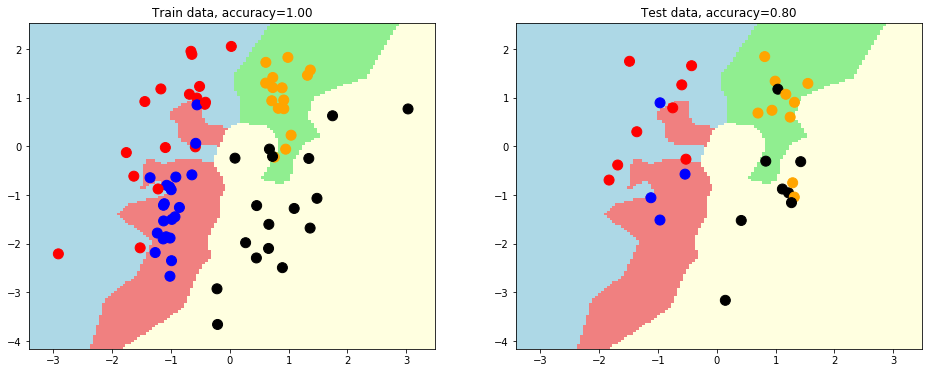

In [59]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

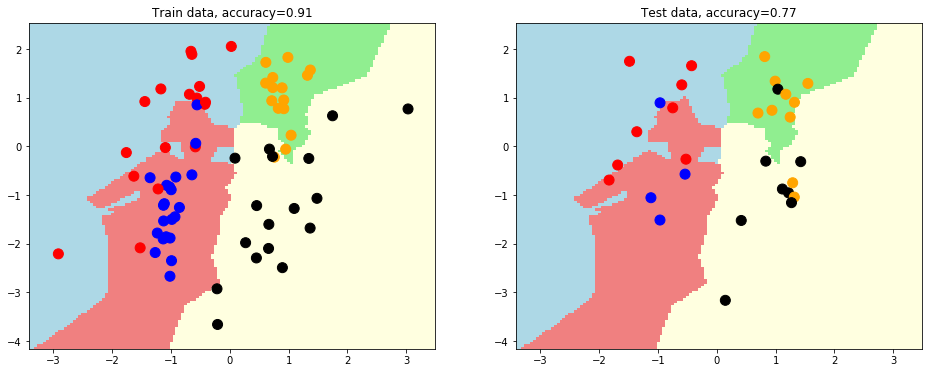

In [53]:

estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

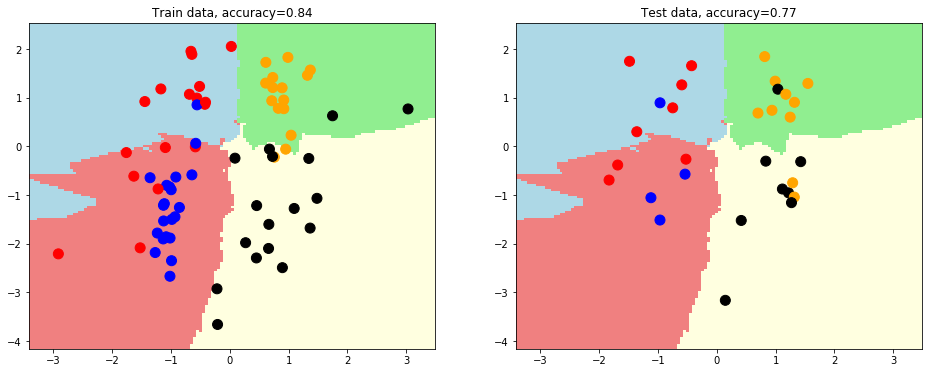

In [45]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=8)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

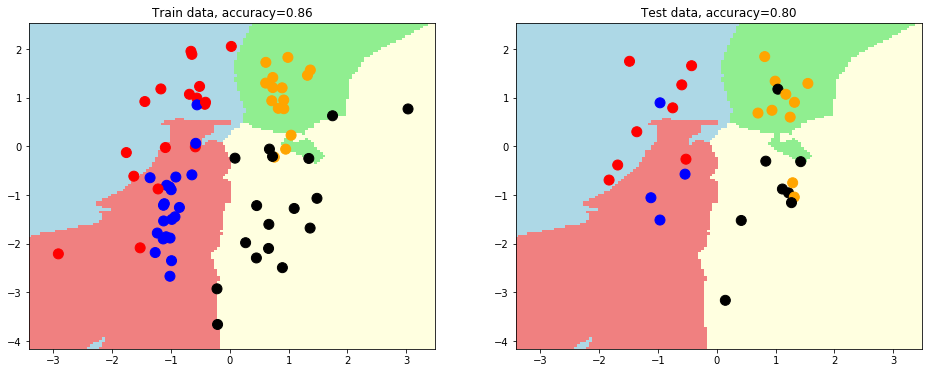

In [94]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=4)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Построим график зависимости accuracy в кросс-валидации от k

In [60]:
from sklearn.model_selection import cross_val_score

mean_scores = []
ks = []

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, classification_problem[0], classification_problem[1], cv=5)
    mean_scores.append(scores.mean())
    ks.append(k)

Оптимальное значение количества соседей = 4


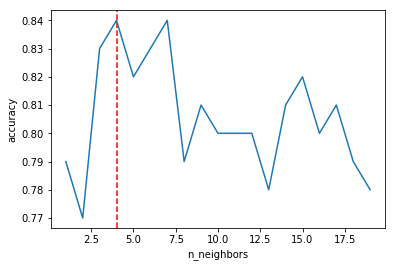

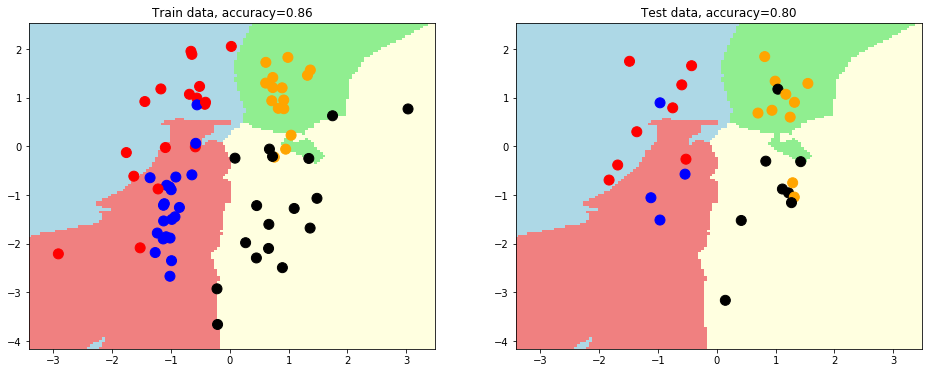

In [96]:
plt.figure()

best_k = ks[np.argmax(mean_scores)]
print('Оптимальное значение количества соседей = {}'.format(ks[np.argmax(mean_scores)]))

plt.axvline(best_k, c='r', linestyle='--')
plt.plot(ks, mean_scores)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()



estimator = neighbors.KNeighborsClassifier(n_neighbors=best_k)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

второе задание


In [128]:
from sklearn.datasets import load_digits, load_breast_cancer

In [137]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

clfs = [(BernoulliNB(), 'Bernoulli'), (MultinomialNB(), 'Multinomial'), (GaussianNB(), 'Gaussian')]

In [138]:
def cmp_clfs(ds, ds_name, cv=3, clfs=clfs):

    for clf in clfs:
        scores = cross_val_score(clf[0], ds.data, ds.target, cv=cv)
        mean_score = scores.mean()
        print("for dataset *{}* accuracy is {:.4f} ({})".format(ds_name, mean_score, clf[1]))

In [139]:
cmp_clfs(digits, 'digits')

for dataset *digits* accuracy is 0.8258 (Bernoulli)
for dataset *digits* accuracy is 0.8709 (Multinomial)
for dataset *digits* accuracy is 0.8186 (Gaussian)


In [140]:
cmp_clfs(breast_cancer, 'breast_cancer')

for dataset *breast_cancer* accuracy is 0.6274 (Bernoulli)
for dataset *breast_cancer* accuracy is 0.8946 (Multinomial)
for dataset *breast_cancer* accuracy is 0.9367 (Gaussian)



(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
(d) На вещественных признаках лучше всего сработало нормальное распределение

Ответы:
1)0.9367
2)0.8709
(c) - на датасете digits, и (d) - на датасете breast_cancer

третье задание

In [117]:
import numpy as np
points = 500
x = np.linspace(0, 100,points)

In [118]:
var = 0.2
epss = np.random.normal(scale=np.sqrt(var), size=points)
y = 0.5 * x + 1 + epss

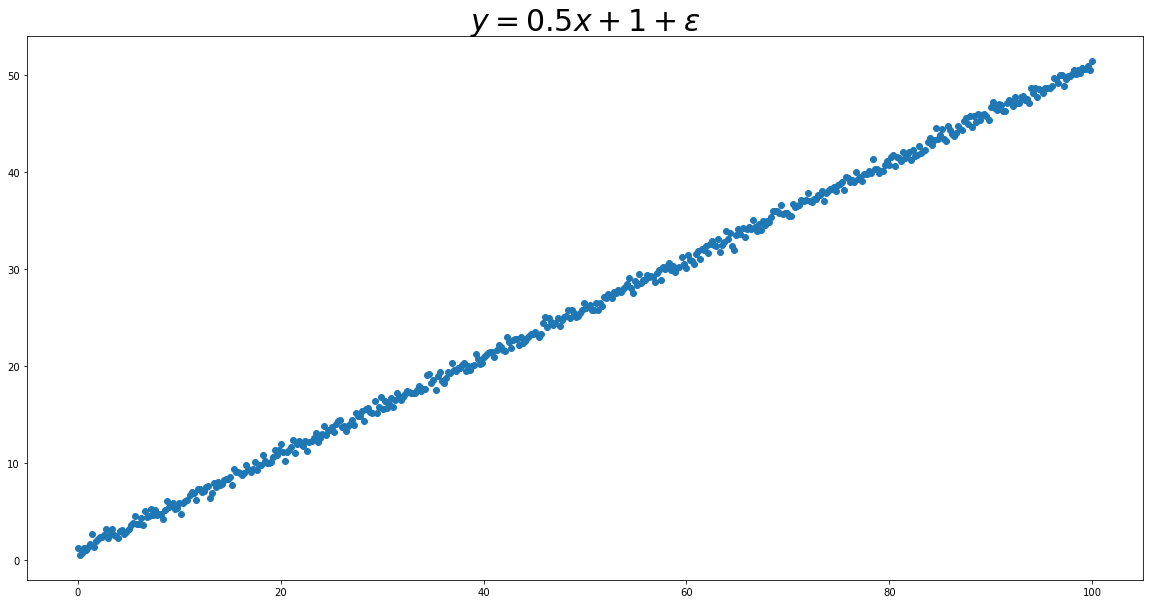

In [119]:
plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.title("$y = 0.5 x + 1 + \epsilon$", fontsize=30)
plt.show()

Восстановить зависимость y(x) в предположении, что y=kx + b, минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.

In [120]:
from scipy import optimize

def f_mse(b,k,x,y):
    y_pred = (k * x) + b
    mse = ((y - y_pred) ** 2).mean()
    return mse

b,k = optimize.minimize(lambda par: f_mse(par[0],par[1],x,y), [0, 0]).x
print("actual    (b,k) are ({}, {})".format(1, 0.5))
print("predicted (b,k) are ({:.3f}, {:.3f})".format(b, k))

actual    (b,k) are (1, 0.5)
predicted (b,k) are (0.926, 0.501)


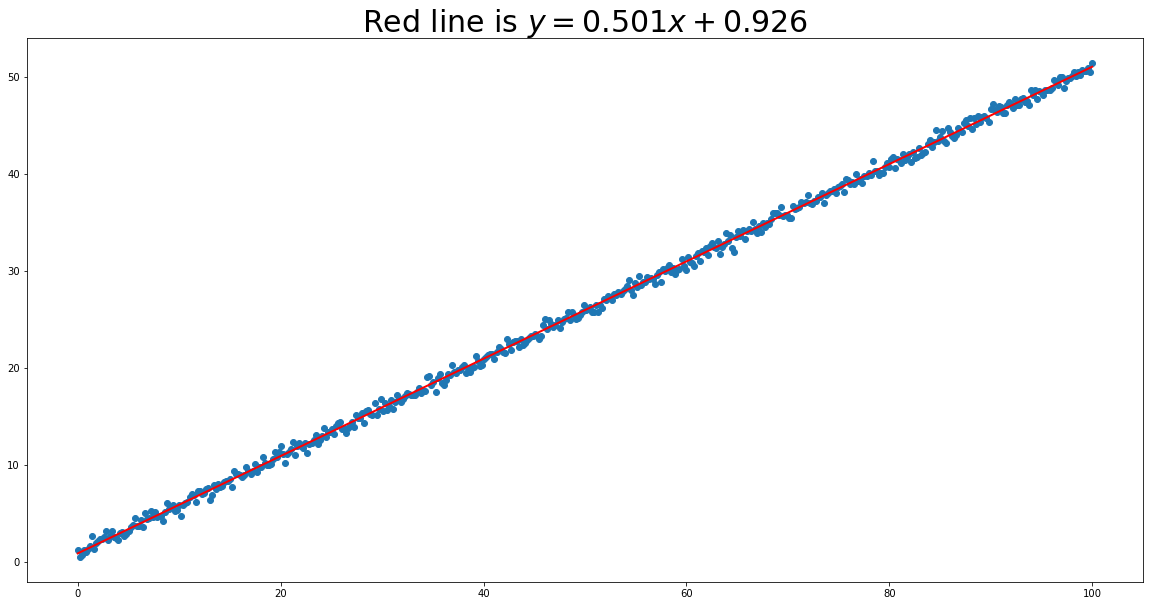

In [121]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.plot(x, b + (x * k), linewidth=2, c='r')
plt.title('Red line is $y = {:.3f} x + {:.3f}$'.format(k, b), fontsize=30)
plt.show()

Добавляем 75 точек, для которых y=-1+eps. Восстанавливаем зависимость  y = k*x + b двумя вариантами: через оптимизацию MSE и MAE.

In [122]:
x_add = np.linspace(0,100,75)
x_up = np.concatenate((x, x_add))
epss_add = np.random.normal(loc=var, size=75)
y_up = np.concatenate((y, -1 + epss_add))

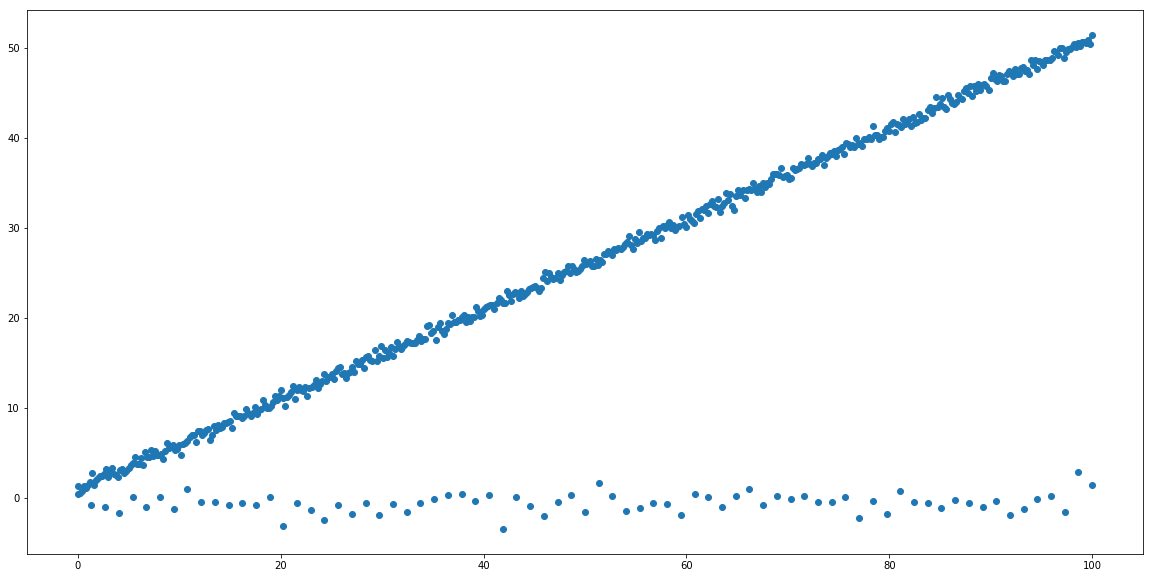

In [123]:
plt.figure(figsize=(20,10))
plt.scatter(x_up, y_up)
plt.show()

MSE

In [124]:
b,k = optimize.minimize(lambda par: f_mse(par[0],par[1],x_up,y_up), [0, 0]).x
print("actual    (b, k) are ({}, {})".format(1, 0.5))
print("predicted (b, k) are ({:.3f}, {:.3f})".format(b, k))

actual    (b, k) are (1, 0.5)
predicted (b, k) are (0.752, 0.435)


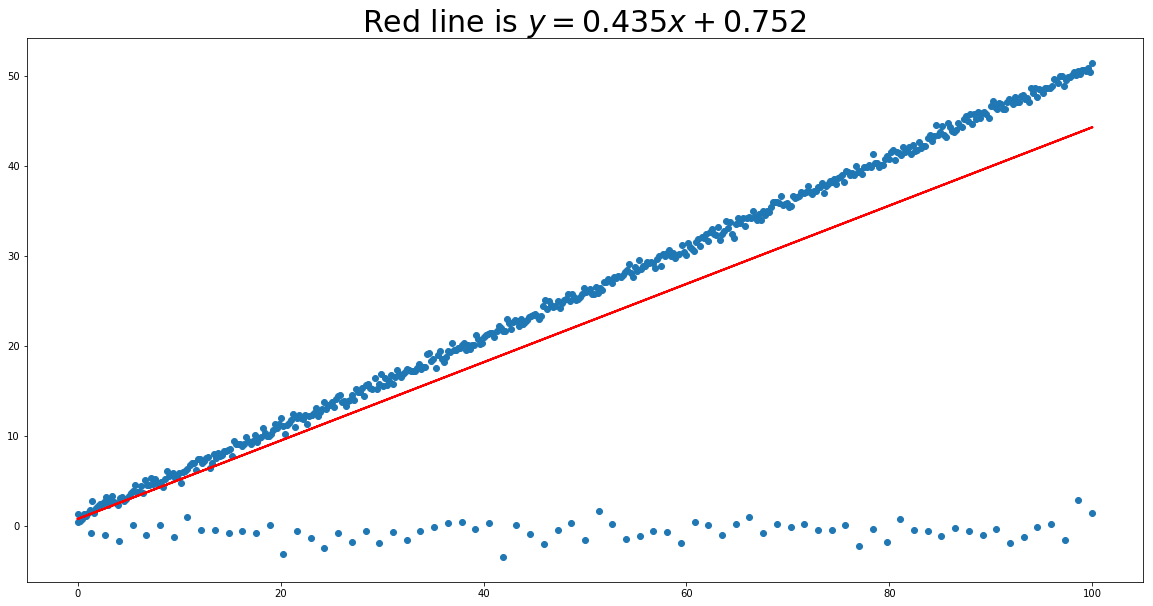

In [125]:
plt.figure(figsize=(20,10))
plt.scatter(x_up,y_up)
plt.plot(x_up, b + (x_up * k), linewidth=2, c='r')
plt.title('Red line is $y = {:.3f} x + {:.3f}$'.format(k, b), fontsize=30)
plt.show()

MAE

In [126]:
def mae(b,k,x,y):
    y_pred = (k * x) + b
    mse = (abs(y - y_pred)).mean()
    return mse

b, k = optimize.minimize(lambda par: mae(par[0],par[1],x_up,y_up), [0, 0]).x
print("actual    (b, k) are ({}, {})".format(1, 0.5))
print("predicted (b, k) are ({:.3f}, {:.3f})".format(b, k))

actual    (b, k) are (1, 0.5)
predicted (b, k) are (0.873, 0.501)


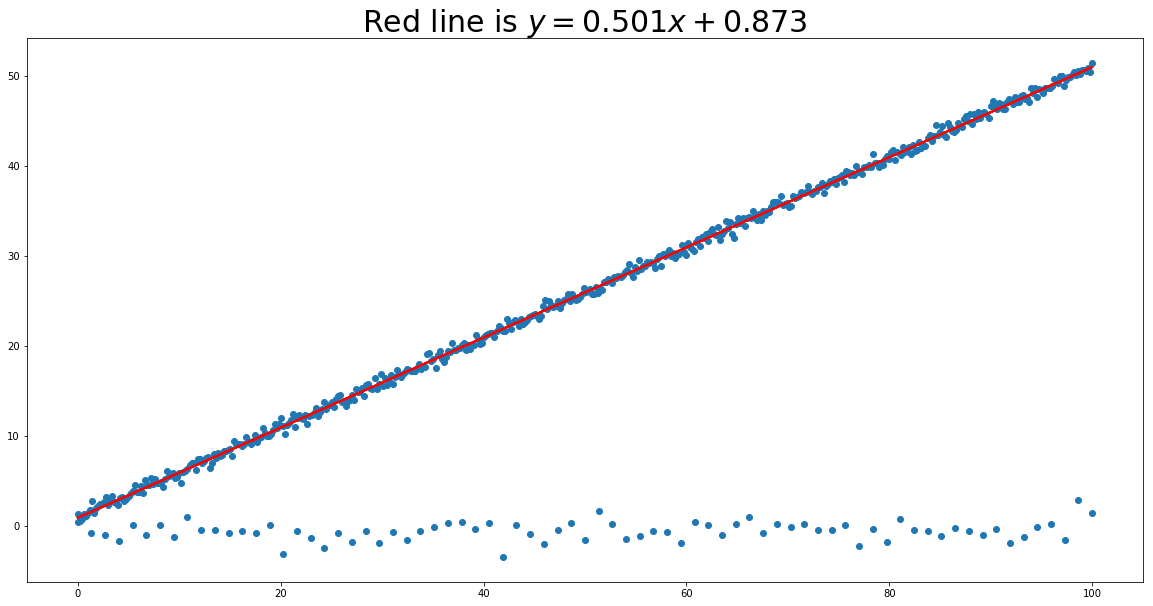

In [127]:
plt.figure(figsize=(20,10))
plt.scatter(x_up,y_up)
plt.plot(x_up, b + (x_up * k), linewidth=2, c='r')
plt.title('Red line is $y = {:.3f} x + {:.3f}$'.format(k, b), fontsize=30)
plt.show()

Сравнивая два графика понимаем, что модель, оптимизирующая MAE более устойчива к выбросам, чем оптимизирующая MSE.
